## 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함.
- 변수 X, Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 함
- 1에 가까울 수록 예측 정확도가 높음. 예측값 Varriance / 실제 값 Variance

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os


In [29]:
pip install openpyxl

In [31]:
df = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [85]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [86]:
ndf.horsepower[ndf.horsepower == '?'] = np.nan # NAN 으로 값 변경
ndf.dropna(subset=['horsepower'],axis=0, inplace=True)
ndf.horsepower = ndf.horsepower.astype('float') # float로 type 변경
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [90]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [37]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state = 11)


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

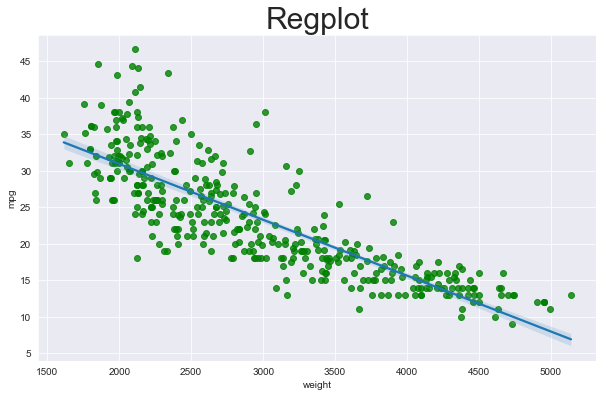

In [36]:
sns.set_style('darkgrid')

fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(ax=axes, x='weight', y='mpg',data=ndf, scatter_kws={'color':'green'})

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [46]:
print(f'기울기: { lr.coef_ }')    # lr.coef가 낮게 나온이유는 그래프의 x축과 y축의 단위가 다르기 떄문이다.

print(f'절편 :{lr.intercept_}')

기울기: [-0.00762163]
절편 :45.97121770475769


In [48]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse},rmse: {rmse},r_square: {r_square}')

mse: 22.168955157340807,rmse: 4.70839199274453,r_square: 0.6410608728212728


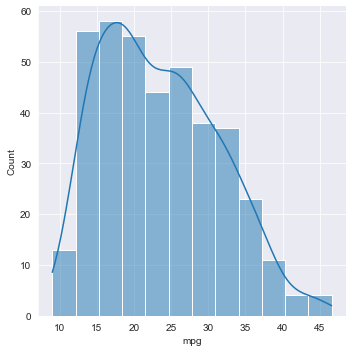

In [49]:
sns.displot(y,kde=True)

<AxesSubplot:ylabel='Density'>

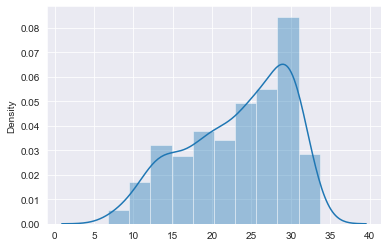

In [50]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

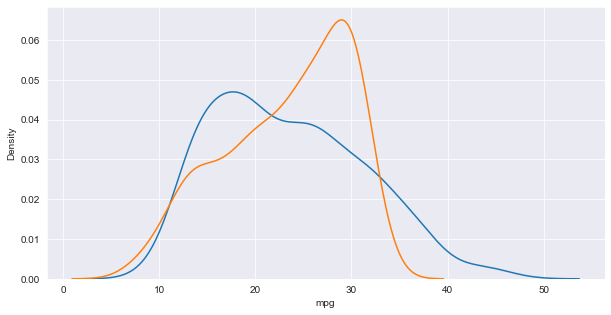

In [57]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

## 다항 회귀분석
- 직선보다 곡선으로 설명하는것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [55]:
X_train.shape

(274, 1)

In [56]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [61]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 4)


In [62]:
X_train_poly[:5]

array([[1.00000000e+00, 2.12000000e+03, 4.49440000e+06, 9.52812800e+09],
       [1.00000000e+00, 4.49900000e+03, 2.02410010e+07, 9.10642635e+10],
       [1.00000000e+00, 1.84500000e+03, 3.40402500e+06, 6.28042612e+09],
       [1.00000000e+00, 2.04500000e+03, 4.18202500e+06, 8.55224112e+09],
       [1.00000000e+00, 1.98500000e+03, 3.94022500e+06, 7.82134662e+09]])

In [63]:
# 차수확인
poly.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3']

In [64]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.6356553548772161

In [67]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -2.60647726e-02  3.78336251e-06 -1.78477552e-10]
70.4971477919491


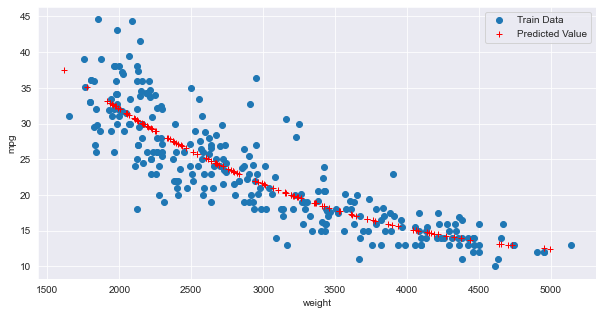

In [72]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()


In [73]:
# 0에서 1 사이의 균일 분포
np.random.rand(100,1)

array([[0.6679177 ],
       [0.8820412 ],
       [0.23064337],
       [0.76033722],
       [0.91327871],
       [0.43712408],
       [0.57594846],
       [0.90218448],
       [0.63363849],
       [0.26016365],
       [0.39776988],
       [0.97986241],
       [0.96543116],
       [0.68488331],
       [0.06865768],
       [0.81026222],
       [0.08316269],
       [0.00529613],
       [0.56857999],
       [0.5020806 ],
       [0.57294587],
       [0.36162916],
       [0.74278798],
       [0.59313644],
       [0.11962067],
       [0.31063326],
       [0.97815678],
       [0.93774709],
       [0.02136663],
       [0.87523171],
       [0.16573973],
       [0.78601597],
       [0.04847339],
       [0.34331686],
       [0.33887924],
       [0.58066499],
       [0.01656991],
       [0.52900647],
       [0.13968401],
       [0.99490912],
       [0.89302035],
       [0.33079939],
       [0.58710547],
       [0.945043  ],
       [0.79324891],
       [0.65392539],
       [0.00316129],
       [0.780

In [80]:
# [과제] X데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

In [ ]:
X_poly = PolynomialFeatures(degree=2.fit_transform(X)

print(X.shape)
print(X_poly.shape)

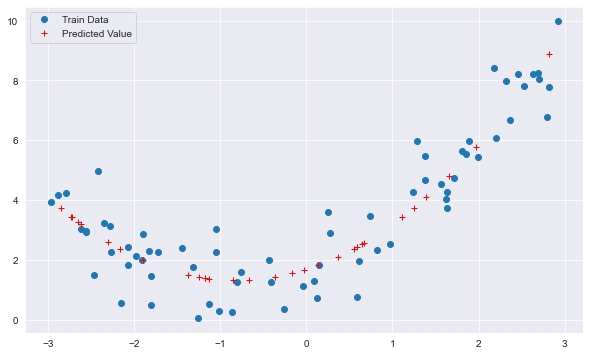

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [82]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

## 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [91]:
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [93]:
X = df.drop('mpg',axis=1)
y = df['mpg']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [95]:
print(f'기울기: { lr.coef_ }')    # lr.coef가 낮게 나온이유는 그래프의 x축과 y축의 단위가 다르기 떄문이다.

print(f'절편 :{lr.intercept_}')

기울기: [-0.60691288 -0.03714088 -0.00522268]
절편 :46.414351269634025


In [96]:
# Q mse, rmse, r_score,기울기,절편
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse}, rmse:{rmse}, r_square:{r_square}')

mse: 17.330085628989945, rmse:4.16294194398504, r_square:0.6939048496695599


In [ ]:
# 과제  y_test, y_hat을 하나의 그래프로 비교하여 시각화

과제 아래 BOston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가

In [1]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd


boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df['PRICE'] = boston.target
print('Boston 데이터 세트 크키:', boston_df.shape)
boston_df.head()

Boston 데이터 세트 크키: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


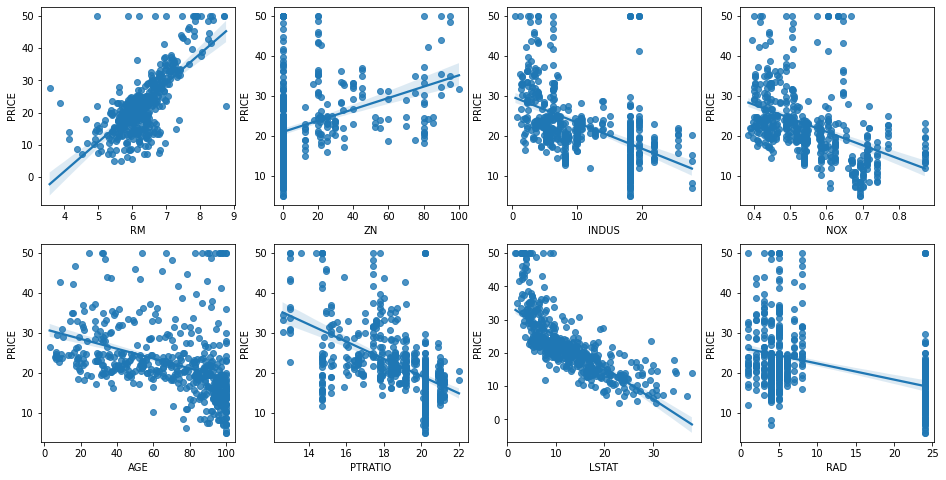

In [6]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y= 'PRICE',data=boston_df, ax=axs[row][col])

In [7]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1, inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3,random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmsse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.163
Variance score : 0.757


In [100]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

절편 값: 40.9955951721646
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [102]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [105]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis =1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr,X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE:5.829


In [2]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd


boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

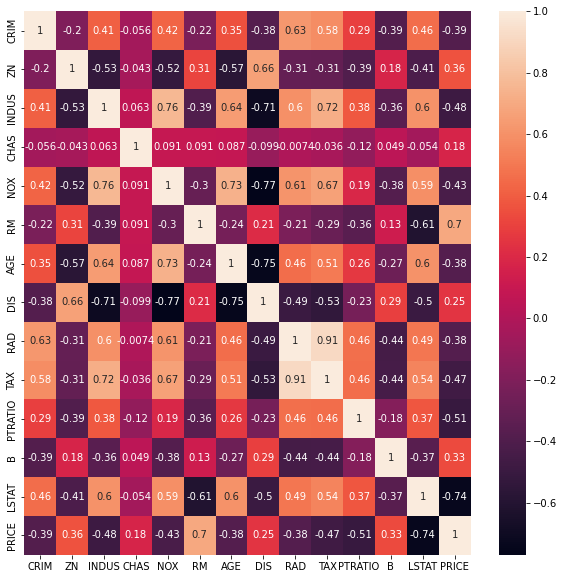

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
hc = boston_df.corr()
plt.figure(figsize=(10,10))

sns.heatmap(hc,annot=True)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

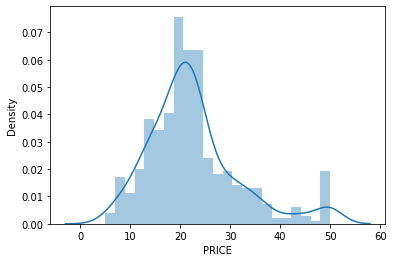

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

sns.distplot(boston_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

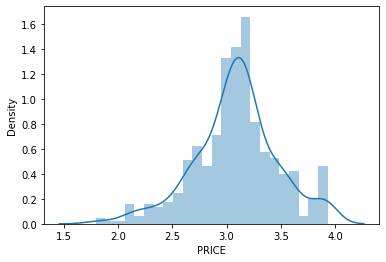

In [6]:
import numpy as np

y_log = np.log1p(boston_df['PRICE'])
sns.distplot(y_log)

In [8]:
# 변수 선택 후 모델링 및 평가
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = boston_df[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y = boston_df['PRICE']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'MSE: {mse:.3f}, RMSE:{rmse:.3f}, R2:{r2:.3f}')

MSE: 25.934, RMSE:5.093, R2:0.717


In [11]:
print(f'절편 값:{lr.intercept_:.3f}')
print(f'회귀 계수 값:{np.round(lr.coef_,1)}')

절편 값:36.903
회귀 계수 값:[  3.2  -0.    0.1 -14.7   0.   -1.2  -0.6   0.1]


#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀
- 다중 공선성의 진단= ( 분산팽창계수)를 구하여 판단

In [12]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X,y, scoring="neg_mean_squared_error", cv=5 )
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(f'rmse scores: {np.round(rmse_scores,3)}')
print(f'평균 rmse:{avg_rmse:.3f}')

rmse scores: [3.216 5.405 6.227 9.091 5.8  ]
평균 rmse:5.948


In [15]:
alphas = [0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.round(np.sqrt(-1 * neg_mse_scores), 2)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha: {alpha}\nRMSE: {rmse_scores}\n평균 RMSE: {avg_rmse:.3f}\n')


alpha: 0
RMSE: [3.4  5.23 6.23 9.47 5.94]
평균 RMSE: 6.051

alpha: 0.1
RMSE: [3.38 5.23 6.22 9.46 5.93]
평균 RMSE: 6.044

alpha: 1
RMSE: [3.28 5.27 6.18 9.42 5.92]
평균 RMSE: 6.013

alpha: 10
RMSE: [3.22 5.4  6.23 9.09 5.8 ]
평균 RMSE: 5.948

alpha: 100
RMSE: [3.52 5.75 6.75 7.8  5.24]
평균 RMSE: 5.811



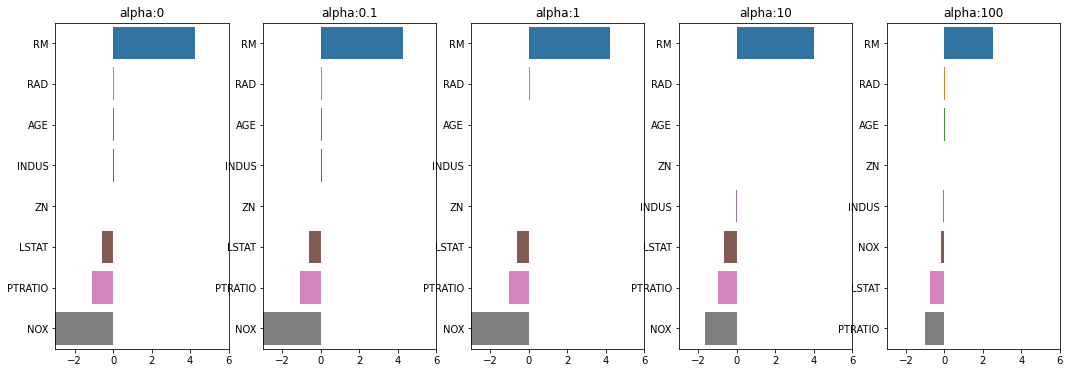

In [18]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    
    coeff = pd.Series(data=ridge.coef_, index=X.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [ ]:
# 과제 모델 이름과 alpha리스트를 대입하면 각 alpha별로 rmse를 구해주는 사용자 함수를 작성하여 아래 수행
lasso [0.07,0.1,0.5,1.3]
elasticnet[0.07,0.1,0.5,1.3]

In [22]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_n=None, y_n=None,
                       verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge':model = Ridgr(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_n,
                                        y_n,scoring="neg_mean_squared_error",cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일때 5 폴드 세트의 평균 RMSE:{1:.3f}'.format(param,avg_rmse))
lasso_alphas = [0.07,0.1,0.5,1.3]
coefd_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_n=X, y_n=y)

###### Lasso ######
alpha 0.07일때 5 폴드 세트의 평균 RMSE:5.998
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.999
alpha 0.5일때 5 폴드 세트의 평균 RMSE:6.054
alpha 1.3일때 5 폴드 세트의 평균 RMSE:6.062
